# 3) Refugees Notebook

In this notebook I will take a look at the demograpghics and trends of displaced persons currently residing in Ireland. I will create a hypothetical scenario in order to apply a binomial distribution to our data. 

#### Section 3.1: Introduction

In [1]:
#Install relevant liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [2]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore') 

#### Section 3.2: Data Preparation

In [3]:
#Reading in the data
df = pd.read_csv("Dataset 6) UN Refugee Data for Ireland.csv")
print(df.head(5))
print(df.shape)

   Year Country of origin Country of origin (ISO) Country of asylum  \
0  1999       Afghanistan                     AFG           Ireland   
1  2000       Afghanistan                     AFG           Ireland   
2  2001       Afghanistan                     AFG           Ireland   
3  2002       Afghanistan                     AFG           Ireland   
4  2003       Afghanistan                     AFG           Ireland   

  Country of asylum (ISO)  Refugees under UNHCR's mandate  Asylum-seekers  \
0                     IRL                               5               0   
1                     IRL                              30               0   
2                     IRL                              41               0   
3                     IRL                              41               0   
4                     IRL                              38              20   

   IDPs of concern to UNHCR Other people in need of international protection  \
0                         0   

Source: https://www.unhcr.org/refugee-statistics/download/?url=1Vq6Bu

In [4]:
#Trimming the Data
columns_to_remove = ['Country of origin (ISO)', 'Country of asylum (ISO)', 
                     'IDPs of concern to UNHCR', 'Other people in need of international protection',
                     'Stateless persons', 'Host Community', 'Others of concern']

df = df.drop(columns = columns_to_remove)

In [5]:
#Renaming the columns 
new_column_names = {"Refugees under UNHCR's mandate": 'Refugees'}
df.rename(columns=new_column_names, inplace=True)
df.head(5)

,Year,Country of origin,Country of asylum,Refugees,Asylum-seekers
0,1999,Afghanistan,Ireland,5,0
1,2000,Afghanistan,Ireland,30,0
2,2001,Afghanistan,Ireland,41,0
3,2002,Afghanistan,Ireland,41,0
4,2003,Afghanistan,Ireland,38,20


In [6]:
#Adding in a total column to sum both Refugees and Asylum-seekers
df['Total'] = df['Refugees'] + df['Asylum-seekers']

print(df.head(5))
print(df['Refugees'].sum())
print(df['Asylum-seekers'].sum())
print(df['Refugees'].sum() + df['Asylum-seekers'].sum())
print(df['Total'].sum())

   Year Country of origin Country of asylum  Refugees  Asylum-seekers  Total
0  1999       Afghanistan           Ireland         5               0      5
1  2000       Afghanistan           Ireland        30               0     30
2  2001       Afghanistan           Ireland        41               0     41
3  2002       Afghanistan           Ireland        41               0     41
4  2003       Afghanistan           Ireland        38              20     58
244085
143942
388027
388027


In [7]:
#Assessing df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               2083 non-null   int64 
 1   Country of origin  2083 non-null   object
 2   Country of asylum  2083 non-null   object
 3   Refugees           2083 non-null   int64 
 4   Asylum-seekers     2083 non-null   int64 
 5   Total              2083 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 97.8+ KB


In [8]:
#Assessing df
print(df.describe())
print(df.shape)

              Year      Refugees  Asylum-seekers         Total
count  2083.000000   2083.000000     2083.000000   2083.000000
mean   2011.399424    117.179549       69.103217    186.282765
std       6.656657   1556.485179      421.925990   1632.295650
min    1984.000000      0.000000        0.000000      5.000000
25%    2006.000000      6.000000        0.000000     10.000000
50%    2012.000000     20.000000        8.000000     33.000000
75%    2017.000000     75.000000       36.000000    131.000000
max    2022.000000  70578.000000    12067.000000  70816.000000
(2083, 6)


#### Section 3.3: Grouping by Year

In [9]:
#Grouping by Year and summing up the values
Year_df = df.groupby('Year').sum()

print(Year_df.head(5))
print(Year_df['Refugees'].sum())
print(Year_df['Asylum-seekers'].sum())

      Refugees  Asylum-seekers  Total
Year                                 
1984       500               0    500
1985       600               0    600
1986       600               0    600
1987       540               0    540
1988       480               0    480
244085
143942


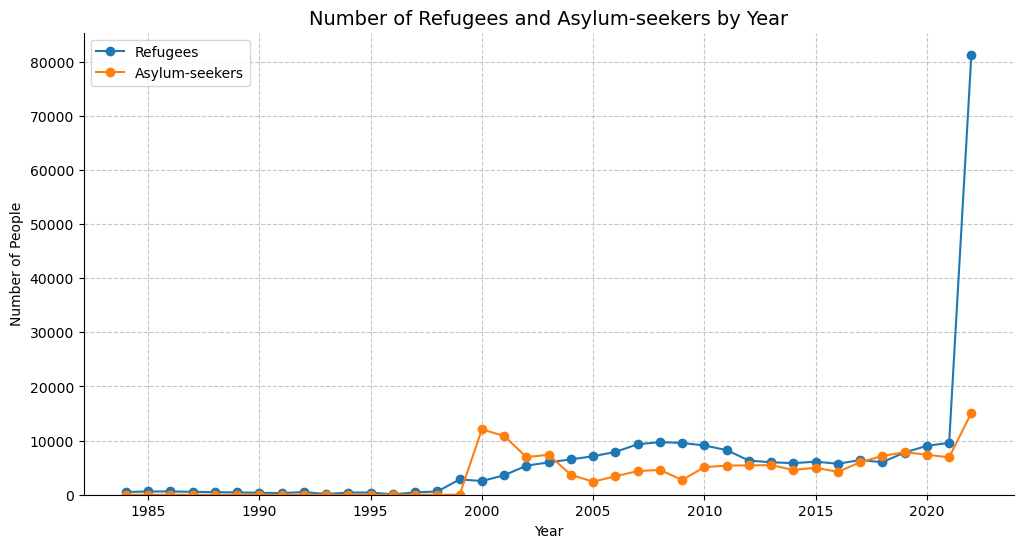

In [10]:
#Plotting our Data
Year_df.plot(y=['Refugees', 'Asylum-seekers'], kind='line', marker='o', linestyle='-', figsize=(12, 6))

#Adding labels and title
plt.title('Number of Refugees and Asylum-seekers by Year', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=0)
plt.show()

I think the latest year skews the view of the graph slightly. So I have decided to replot this graph with 2022 year removed so we can get a closer look at the prior years. 

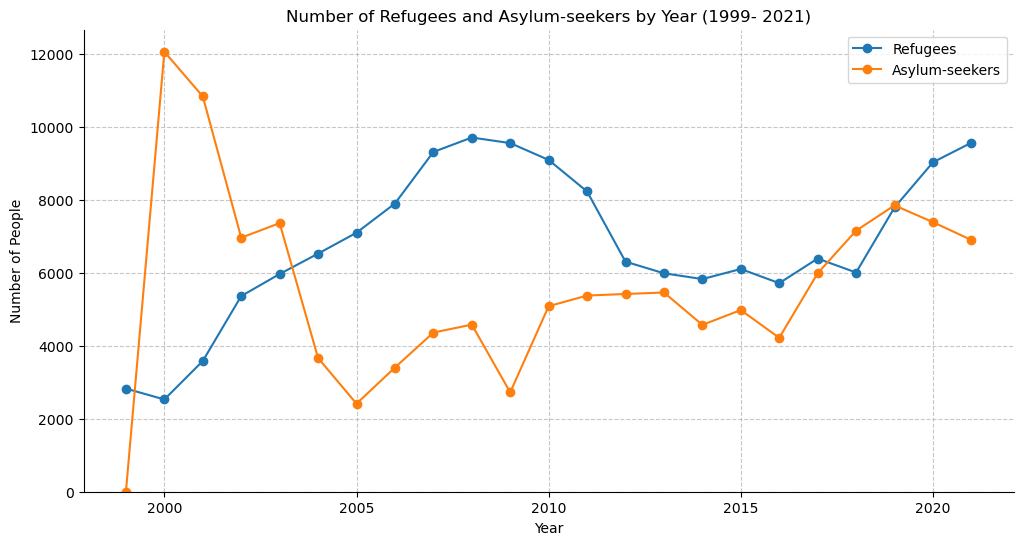

In [12]:
#Filtering the data
Year_df_filtered = Year_df[(Year_df.index >= 1999) & (Year_df.index != 2022)]

#Plotting the filtered data
Year_df_filtered.plot(y=['Refugees', 'Asylum-seekers'], kind='line', marker='o', linestyle='-', figsize=(12, 6))

#Adding labels and title
plt.title('Number of Refugees and Asylum-seekers by Year (1999- 2021)')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=0)
plt.show()

Allignment with Tufte's Principles: 

Data-Ink Ratio: The line plot uses appropraite ink to represent the data. The lines and markers convey the information concisely.

Axes and Grids: The removal of the top and right spines and the addition of grid lines contribute to a cleaner look. The grid lines are subtle, enhancing readability without overpowering the data.

It is important to note when looking at this graph that the large jump in refugee numbers in 2022 is due too the large intake of Ukrainian Refugees following the Russian invasion of Ukriane

#### Section 3.4: Displaced Persons by Country of Origin

In [13]:
#Select a specific year as the data is in stock format

#df_year = df1[df1['Year'] == 2022]
df_year = df[df['Year'] == 2021]

print(df_year.head())
print(df_year.shape)
print(df_year['Total'].sum())

     Year Country of origin Country of asylum  Refugees  Asylum-seekers  Total
22   2021       Afghanistan           Ireland       549             170    719
45   2021           Albania           Ireland       206             413    619
69   2021           Algeria           Ireland        68             301    369
93   2021            Angola           Ireland        52              25     77
116  2021             Egypt           Ireland        51              64    115
(96, 6)
16475


In [14]:
#Defining a small country index
small_countries = df_year['Country of origin'][df_year['Total'] < 300].tolist()

#Renaming all 'small countries' as to not clutter the chart 
df_year.loc[df_year['Country of origin'].isin(small_countries), 'Country of origin'] = 'All Other Countries'

In [15]:
#Grouping the data
df_year = df_year.groupby('Country of origin', as_index=False).sum()

print(df_year.head())
print(df_year.shape)
print(df_year['Total'].sum())

        Country of origin    Year  Refugees  Asylum-seekers  Total
0             Afghanistan    2021       549             170    719
1                 Albania    2021       206             413    619
2                 Algeria    2021        68             301    369
3     All Other Countries  167743      2762            1744   4506
4  Dem. Rep. of the Congo    2021       458             132    590
(14, 5)
16475


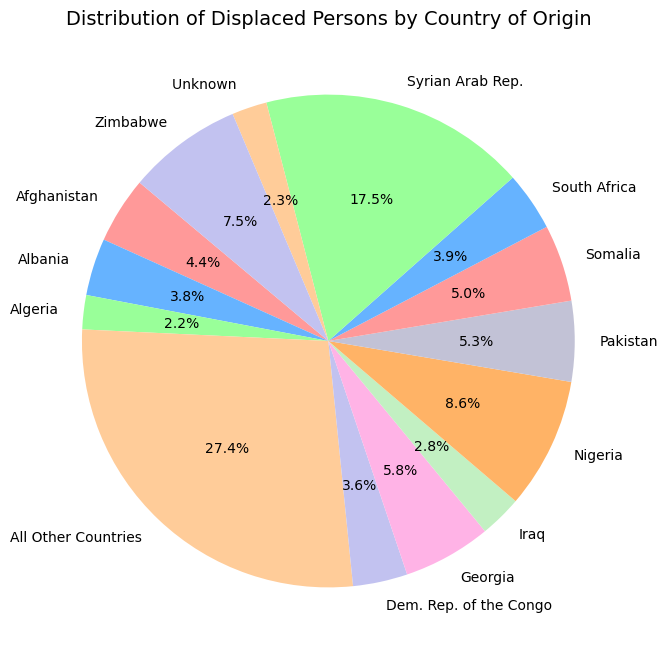

In [16]:
#Define a custom color scheme
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', 
                 '#ffb3e6', '#c2f0c2', '#ffb366', '#c2c2d6']

#Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_year['Total'], labels = df_year['Country of origin'], 
        autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '', 
        startangle=140, colors=custom_colors)

#Title
plt.title('Distribution of Displaced Persons by Country of Origin', fontsize = 14)
plt.show()

#### Section 3.5: Displaced Persons Palestine, Israel & Ukraine

In [17]:
#Selecting my chosen countries
Pal_df = df[df['Country of origin'] == 'Palestinian']
Isr_df = df[df['Country of origin'] == 'Israel']

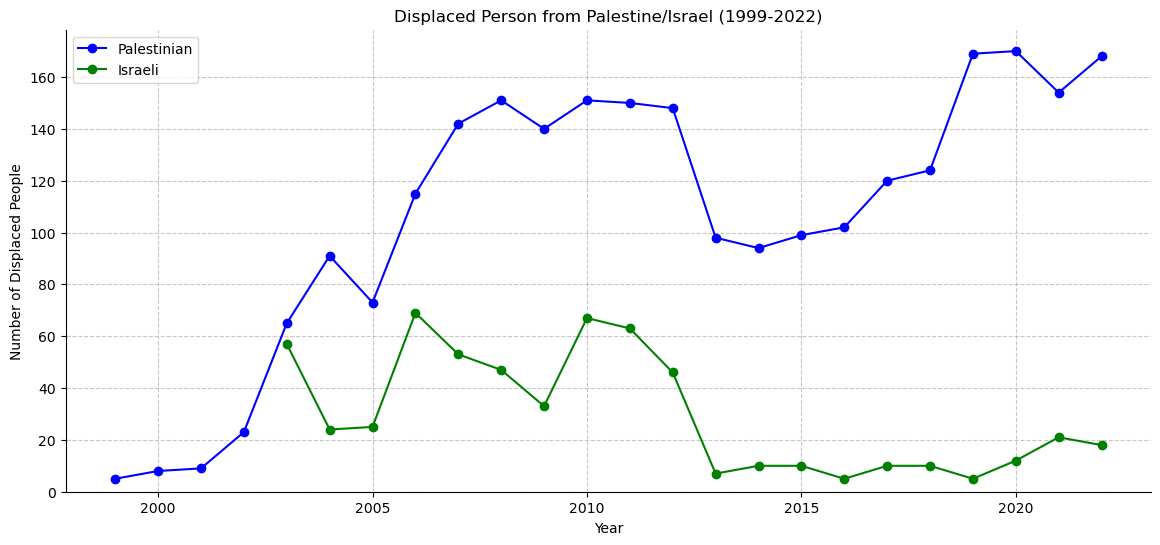

In [18]:
#Plotting
plt.figure(figsize=(14, 6))
plt.plot(Pal_df['Year'], Pal_df['Total'], label='Palestinian', marker='o', color='blue')
plt.plot(Isr_df['Year'], Isr_df['Total'], label='Israeli', marker='o', color='green')
#Colours were chosen based off the countries respective flags

#Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Displaced People')
plt.title('Displaced Person from Palestine/Israel (1999-2022)')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=0)

#Display the plot
plt.show()

In [19]:
#Selecting my chosen country
Ukr_df = df[df['Country of origin'] == 'Ukraine']

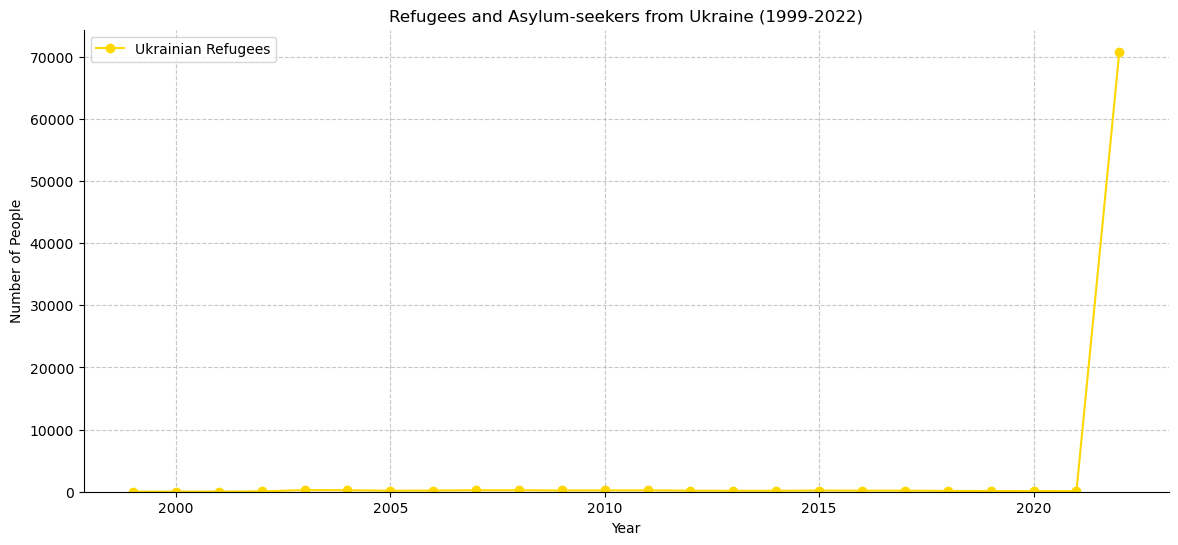

In [20]:
#Plotting
plt.figure(figsize=(14, 6))
plt.plot(Pal_df['Year'], Ukr_df['Total'], label='Ukrainian Refugees', marker='o', color = '#FFD700')
#Dark yellow was chosen as it is often associated with Ukraine

#Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Refugees and Asylum-seekers from Ukraine (1999-2022)')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(bottom=0)

#Display the plot
plt.show()

#### Section 3.6: Displaced Persons per Capita

In [21]:
#Reading in the dataset
Pop_df = pd.read_csv("Dataset 7) PEA01.csv")

#print(Pop_df.head(5))

In [22]:
#Trimming the data columns 
selected_columns = ['Age Group', 'Sex', 'Year', 'VALUE']
Pop_df = Pop_df[selected_columns]

#Pop_df.head(5)

In [23]:
#Trimming the data rows
Pop_df = Pop_df[(Pop_df['Age Group'] == 'All ages') & 
                 (Pop_df['Sex'] == 'Both sexes')]
#Pop_df

In [24]:
# Remove columns
Pop_df = Pop_df.drop(columns=['Sex', 'Age Group'])

In [25]:
Pop_df.rename(columns={'VALUE': 'Population'}, inplace=True)

print(Pop_df.head(5))
print(Pop_df.shape)

     Year  Population
78   1950      2969.0
159  1951      2960.6
240  1952      2952.9
321  1953      2949.0
402  1954      2941.2
(74, 2)


In [26]:
#Assess df
Pop_df.describe()

,Year,Population
count,74.000000,74.000000
mean,1986.500000,3641.322973
std,21.505813,718.940701
min,1950.000000,2818.300000
25%,1968.250000,2954.825000
50%,1986.500000,3527.350000
75%,2004.750000,4111.650000
max,2023.000000,5281.600000


In [27]:
#Assess df
Pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 78 to 5991
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        74 non-null     int64  
 1   Population  74 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [28]:
#Join the 2 dataframes
merged_df = pd.merge(Pop_df, Year_df, on='Year', how='inner')

#Rename the total column
merged_df = merged_df.rename(columns={'Total': 'Displaced Persons'})

In [29]:
#Define function
def multiply_by_1000(x):
    return x*1000

#Apply the function to the column
merged_df['Population'] = merged_df['Population'].apply(multiply_by_1000)

merged_df

,Year,Population,Refugees,Asylum-seekers,Displaced Persons
0,1984,3529000.0,500,0,500
1,1985,3540000.0,600,0,600
2,1986,3540600.0,600,0,600
3,1987,3546500.0,540,0,540
4,1988,3530700.0,480,0,480
5,1989,3509500.0,420,0,420
6,1990,3505800.0,360,0,360
7,1991,3525700.0,300,0,300
8,1992,3554500.0,500,0,500
9,1993,3574100.0,119,0,119


In [30]:
#Adding columns for change
merged_df['Population Change'] = merged_df['Population'].diff()
merged_df['Displaced Persons Change'] = merged_df['Displaced Persons'].diff()
merged_df['Displaced Persons per Capita'] = merged_df['Displaced Persons'] / merged_df['Population']

print(merged_df.head(5))
print(merged_df.shape)
#print(merged_df.describe())

   Year  Population  Refugees  Asylum-seekers  Displaced Persons  \
0  1984   3529000.0       500               0                500   
1  1985   3540000.0       600               0                600   
2  1986   3540600.0       600               0                600   
3  1987   3546500.0       540               0                540   
4  1988   3530700.0       480               0                480   

   Population Change  Displaced Persons Change  Displaced Persons per Capita  
0                NaN                       NaN                      0.000142  
1            11000.0                     100.0                      0.000169  
2              600.0                       0.0                      0.000169  
3             5900.0                     -60.0                      0.000152  
4           -15800.0                     -60.0                      0.000136  
(39, 8)


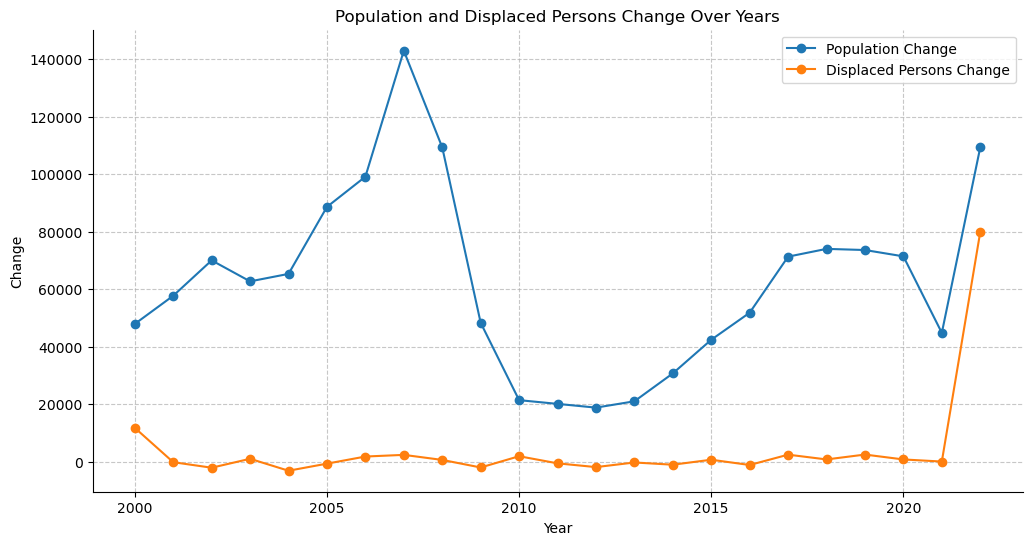

In [31]:
#Trimming df
df = merged_df[merged_df['Year'] >= 2000]
plt.figure(figsize=(12, 6))

#Plotting Population Change
plt.plot(df['Year'], df['Population Change'], label='Population Change', marker='o')

#Plotting Displaced Persons Change
plt.plot(df['Year'], df['Displaced Persons Change'], label='Displaced Persons Change', marker='o')

#Adding labels and title
plt.xlabel('Year')
plt.ylabel('Change')
plt.title('Population and Displaced Persons Change Over Years')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Display the plot
plt.show()

#### Section 3.7 Applying the Binomial Distribution 

We can use the binomial distribution to model the probability of a person being a displaced person within a particular sample. 

Lets start by taking a sample of 1000 members of the Irish population in any given year since 2010. 

The aim of this is to find the probability distribution of the amount of Displaced Persons that we would see in a population sample of this size 

In [32]:
#Filter data for years from 2010
df_from_2010 = merged_df[merged_df['Year'] >= 2010]

#df_from_2010

In [33]:
#Defining the mean
p = np.mean(df_from_2010['Displaced Persons per Capita'])
p

0.003950625097512894

In [34]:
#Setting parameters for the distribution
population_size = 1000
binom_dist = binom(population_size, p)

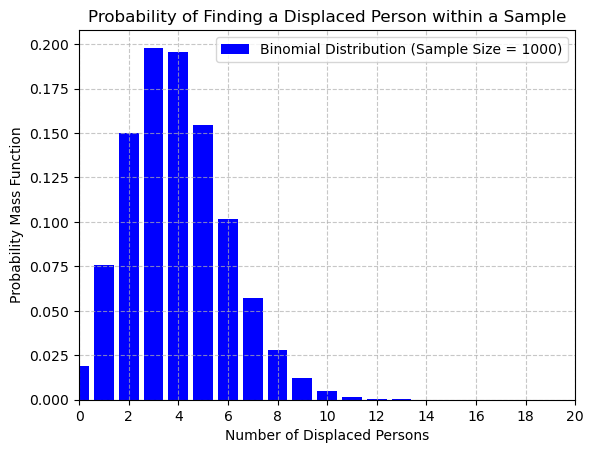

In [35]:
#Plot the binomial distribution
x = np.arange(0, population_size)
pmf_values = binom_dist.pmf(x)

plt.bar(x, pmf_values, label='Binomial Distribution (Sample Size = 1000)', color='blue')
#I chose blue as it is often associated with mathematics/statistics 

plt.title('Probability of Finding a Displaced Person within a Sample')
plt.xlabel('Number of Displaced Persons')
plt.ylabel('Probability Mass Function')
plt.xlim(0, 20)
plt.xticks(np.arange(0, 21, step=2))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Now lets repeat these calculations with a larger sample of 10000 Irish people in any given year

In [36]:
#Setting parameters for the distribution
population_size = 10000
binom_dist = binom(population_size, p)

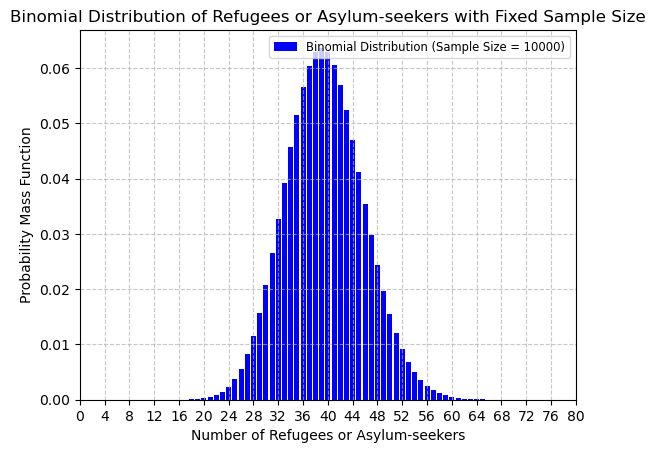

In [37]:
# Create the binomial distribution
binom_dist = binom(population_size, p)

# Plot the binomial distribution
x = np.arange(0, population_size)
pmf_values = binom_dist.pmf(x)

plt.bar(x, pmf_values, label='Binomial Distribution (Sample Size = 10000)', color='blue')
plt.title('Binomial Distribution of Refugees or Asylum-seekers with Fixed Sample Size')
plt.xlabel('Number of Refugees or Asylum-seekers')
plt.xlim(0, 80)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 81, step=4))
plt.ylabel('Probability Mass Function')
plt.legend(fontsize='small')
plt.show()

##### Central Limit Theoreom

We can clearly see that the above chart closely resembles that of a Nomral Distribution. The phenomenon is known as the Central Limit Theorom or "CLT".

The Central Limit Theorem states that the distribution of the sum (or average) of a large number of independent, identically distributed random variables approaches a normal distribution, regardless of the original distribution of the variables.

In the context of a binomial distribution, as the sample size increases, the shape of the binomial distribution becomes more symmetric and bell-shaped, resembling a normal distribution. This happens because, with a larger sample size, there are more possible combinations of outcomes, and the distribution becomes smoother.

I have discussed in Section 2.10 why the Binomial Distibution is appropriate and why the Normal Distribution is not suitable for a very similar scenario. If I were to discuss here I would largely by making the exact same points so I will simply refer you to this section to gain some insights into this discussion. 

End